# <div style="text-align: center; background-color: #2A3990; color: white; padding: 14px; line-height: 1;border-radius:14px"> Survival in Titatnic</div>

# - About Titanic's Sinking

* At 11:40 pm (ship's time) on 14 April, lookout Frederick Fleet spotted an iceberg immediately ahead of Titanic and alerted the bridge. First Officer William Murdoch ordered the ship to be steered around the obstacle and the engines to be reversed, but it was too late; the starboard side of Titanic struck the iceberg, creating a series of holes below the waterline. (source: Aldridge, Rebecca (2008). The Sinking of the Titanic. New York: Infobase Publishing. ISBN 978-0-7910-9643-7.)

# <div style="text-align: center; background-color: #9C254D; color: white; padding: 14px; line-height: 1;border-radius:14px"> Import Libraries</div>

In [40]:
#Handle data
import pandas as pd
import numpy as np

#Plot data
import matplotlib.pyplot as plt
import seaborn as sns

#Style data
sns.set()

#Feature engineer
from sklearn.preprocessing import LabelEncoder

#Models
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from lightgbm.sklearn import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC

#Model selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# <div style="text-align: center; background-color: #9C254D; color: white; padding: 14px; line-height: 1;border-radius:14px"> Exploration Data Analysis</div>

In [3]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Let's drop Cabin, it have a lot of missing values

In [6]:
data1 = train_data.drop(['Cabin'],axis=1)

Now, we have to fill the missing values of Age, there are a few, we can fill it with the median. 

In [7]:
data1['Age'] = data1['Age'].fillna(data1['Age'].median())

Also, In Embarked we will fill it with the mode.

In [8]:
data1['Embarked'] = data1['Embarked'].fillna(data1['Embarked'].mode()[0])

In [9]:
data1.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


Text(0.5, 1.0, 'Fare')

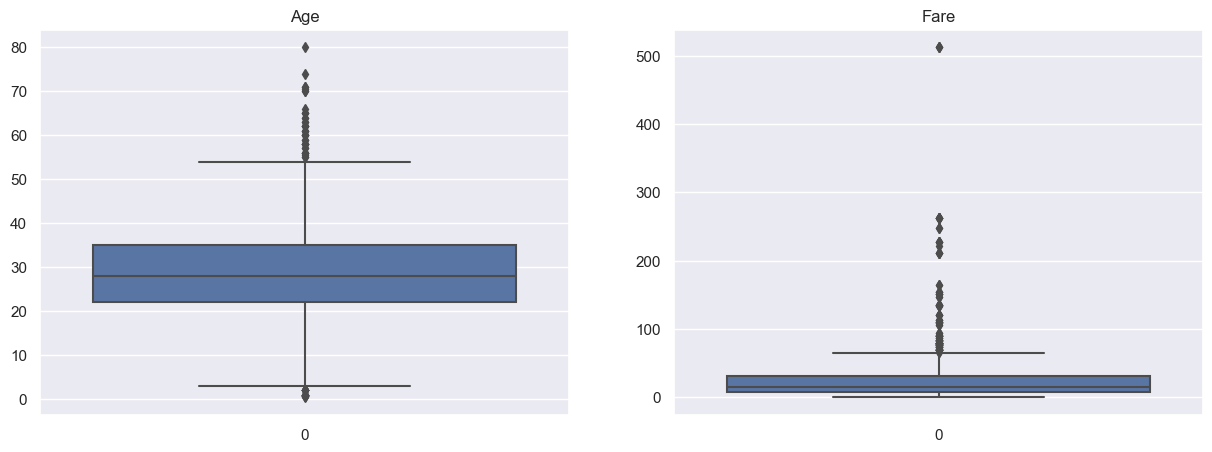

In [10]:
f, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15,5))
sns.boxplot(data1['Age'],ax= ax1).set_title('Age')
sns.boxplot(data1['Fare'],ax=ax2).set_title('Fare')

There're many outliers in both columns.

[Text(0, 0, '646'), Text(0, 0, '168'), Text(0, 0, '77')]

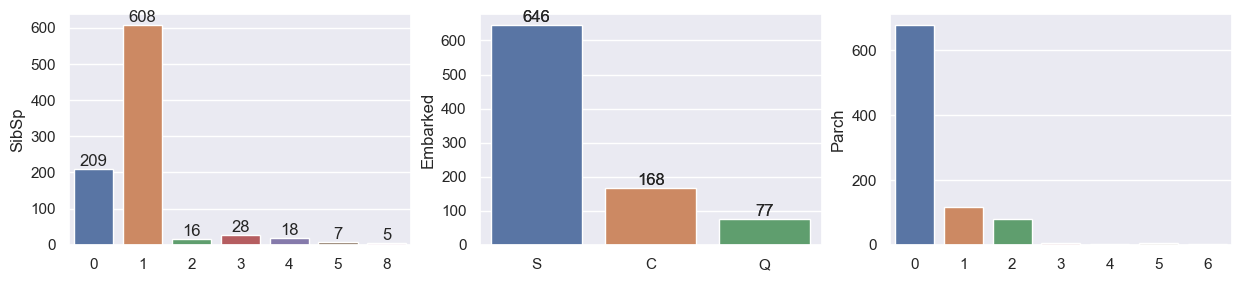

In [74]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,3))
sns.barplot(x=data1['SibSp'].unique(),y=data1['SibSp'].value_counts(),ax=ax1)
ax1.bar_label(ax1.containers[0])
sns.barplot(x=data1['Embarked'].unique(),y=data1['Embarked'].value_counts(),ax=ax2)
ax2.bar_label(ax2.containers[0])
sns.barplot(x=data1['Parch'].unique(),y=data1['Parch'].value_counts(),ax=ax3)
ax2.bar_label(ax2.containers[0])

For SibSp the values are concentred in 1. (Number of siblings)

For Embarked the values are concentred in S port.

For Parch the values are concentred in 0. (Number of parents)

[Text(0, 0, '577'), Text(0, 0, '314')]

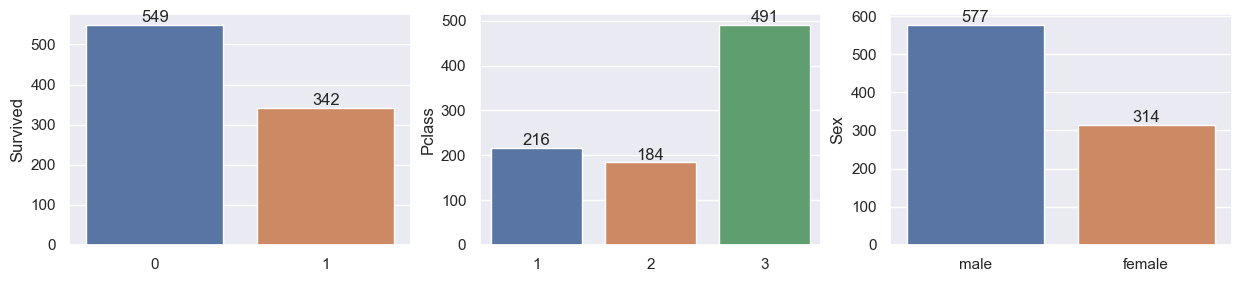

In [75]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,3))
sns.barplot(x=data1['Survived'].unique(),y=data1['Survived'].value_counts(),ax=ax1)
ax1.bar_label(ax1.containers[0])
sns.barplot(x=data1['Pclass'].unique(),y=data1['Pclass'].value_counts(),ax=ax2)
ax2.bar_label(ax2.containers[0])
sns.barplot(x=data1['Sex'].unique(),y=data1['Sex'].value_counts(),ax=ax3)
ax3.bar_label(ax3.containers[0])

There're more people who died.

There're more people in the 3rd class.

There're more men than women.

/var/folders/06/pvd15jn934z7w3kzys42mzlc0000gn/T/ipykernel_5048/3962102600.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr(),annot=True,linewidths=1)


<AxesSubplot: >

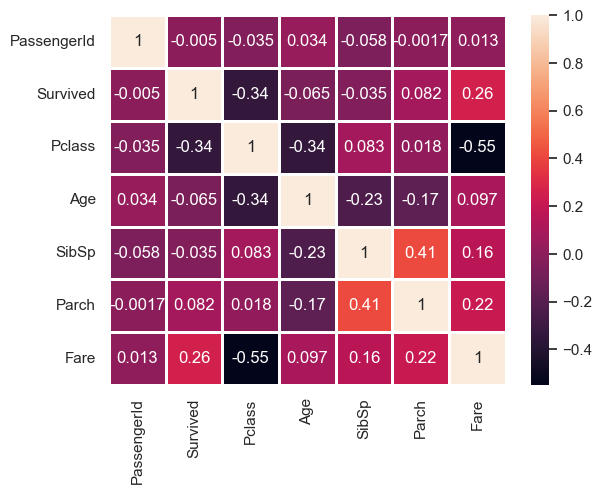

In [13]:
sns.heatmap(data1.corr(),annot=True,linewidths=1)

In the matrix, it can be seen that Pclass and Fare have a strong relation with Survived (target). For Age, SibSp and Parch there is a relation but not strong.

# <div style="text-align: center; background-color: #9C254D; color: white; padding: 14px; line-height: 1;border-radius:14px"> Feature Engineering</div>

## <div style="text-align: left; background-color: #D23369; font-family:newtimeroman; color: white; padding: 10px; line-height: 1;border-radius:14px"><b>Removing Outliers</b></div>

In [26]:
q1 = np.percentile(data1['Age'],25)
q3 = np.percentile(data1['Age'],75)
iqr = q3 - q1
data2 = data1[(data1['Age'] < (q3+1.5*iqr)) & (data1['Age'] > (q1-1.5*iqr))]
data2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
q1 = np.percentile(data2['Fare'],25)
q3 = np.percentile(data2['Fare'],75)
iqr = q3 - q1
data3 = data2[(data2['Fare'] < (q3+1.5*iqr)) & (data2['Fare'] > (q1-1.5*iqr))]
data3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q


Text(0.5, 1.0, 'Fare')

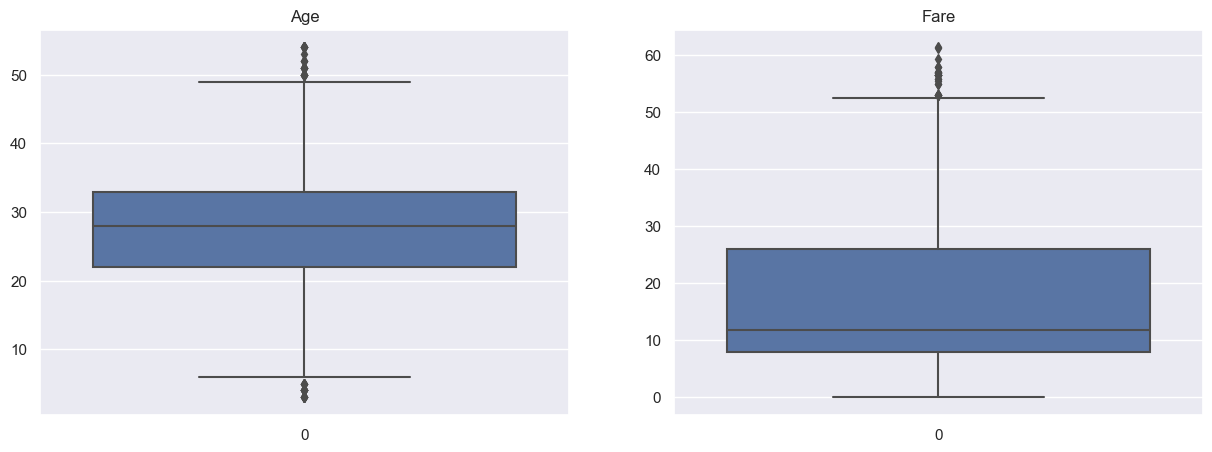

In [28]:
f, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15,5))
sns.boxplot(data3['Age'],ax= ax1).set_title('Age')
sns.boxplot(data3['Fare'],ax=ax2).set_title('Fare')

## <div style="text-align: left; background-color: #D23369; font-family:newtimeroman; color: white; padding: 10px; line-height: 1;border-radius:14px"><b>Encoding Gender</b></div>

In [31]:
encoder = LabelEncoder()
gender_encode = encoder.fit_transform(data3['Sex'])
data3['gender_encode'] = gender_encode
data3.head()

/var/folders/06/pvd15jn934z7w3kzys42mzlc0000gn/T/ipykernel_5048/26306163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['gender_encode'] = gender_encode


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,gender_encode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,1


## <div style="text-align: left; background-color: #D23369; font-family:newtimeroman; color: white; padding: 10px; line-height: 1;border-radius:14px"><b>Creating Dummies Variables</b></div>

First, we have to drop the columns that we won't be using, in this case PassengerId, Name, Ticket and Sex. The reason are the following:

PassengerId: It is the index

Name: There are only uniques values

Ticket: There are only uniques values

Sex: We created a gender encode before.

In [38]:
data_clean = data3.drop(['PassengerId','Name','Ticket','Sex'],axis=1)

In [39]:
data_with_dummies = pd.get_dummies(data_clean,drop_first=True)
data_with_dummies.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,gender_encode,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,28.0,0,0,8.4583,1,1,0


It set the option drop_first = True, because it reduce the multicollinearity. If Embarked_Q = 0 and Embarked_S = 0, it mean that the passenger had embarked in C.

# <div style="text-align: center; background-color: #9C254D; color: white; padding: 14px; line-height: 1;border-radius:14px"> Model Selection</div>

In [41]:
inputs = data_with_dummies.drop('Survived',axis=1)
target = data_with_dummies['Survived']

In [43]:
train_X, test_X, train_y, test_y = train_test_split(inputs,target, random_state=42)

In [49]:
#Random Forest
rfc=RandomForestClassifier()
rfc=rfc.fit(train_X,train_y)

#LightGBM
#boosting_type='gbdt',objective='binary',random_state=42
lgbm = LGBMClassifier()
lgbm.fit(train_X, train_y)

#XGBoost
xgbr = xgb.XGBClassifier()
xgbr.fit(train_X, train_y)

#SVC
#probability=True,random_state=42
svc = SVC(probability=True)
svc.fit(train_X, train_y)

#CatBoost        
cboost = CatBoostClassifier()
cboost.fit(train_X, train_y)

Learning rate set to 0.007906
0:	learn: 0.6883164	total: 6.55ms	remaining: 6.55s
1:	learn: 0.6833067	total: 8.05ms	remaining: 4.02s
2:	learn: 0.6784544	total: 9.64ms	remaining: 3.2s
3:	learn: 0.6753703	total: 13ms	remaining: 3.23s
4:	learn: 0.6704219	total: 14.3ms	remaining: 2.84s
5:	learn: 0.6657721	total: 15.7ms	remaining: 2.59s
6:	learn: 0.6617119	total: 17ms	remaining: 2.4s
7:	learn: 0.6575733	total: 18.3ms	remaining: 2.27s
8:	learn: 0.6532887	total: 19.6ms	remaining: 2.15s
9:	learn: 0.6494149	total: 20.8ms	remaining: 2.06s
10:	learn: 0.6450125	total: 22.2ms	remaining: 2s
11:	learn: 0.6414373	total: 23.3ms	remaining: 1.92s
12:	learn: 0.6371741	total: 24.6ms	remaining: 1.87s
13:	learn: 0.6335637	total: 27.4ms	remaining: 1.93s
14:	learn: 0.6311130	total: 27.9ms	remaining: 1.83s
15:	learn: 0.6272186	total: 28.7ms	remaining: 1.76s
16:	learn: 0.6232445	total: 30.1ms	remaining: 1.74s
17:	learn: 0.6197765	total: 30.9ms	remaining: 1.69s
18:	learn: 0.6161499	total: 31.6ms	remaining: 1.63s
1

In [77]:
svc.predict(test_X)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0])

In [59]:
svc.predict_proba(test_X)[:,1]

array([0.29269012, 0.35519625, 0.28773968, 0.31996898, 0.29136482,
       0.30146499, 0.29532695, 0.70675168, 0.29334658, 0.31485962,
       0.29436044, 0.29334658, 0.29250574, 0.28996963, 0.29240462,
       0.30398463, 0.29268747, 0.29835048, 0.37236876, 0.29498019,
       0.30052899, 0.3103789 , 0.31875582, 0.2994341 , 0.30138465,
       0.2889948 , 0.31464515, 0.29334658, 0.31671862, 0.29843872,
       0.3391576 , 0.31161006, 0.29244401, 0.29078017, 0.31486452,
       0.69040461, 0.29044554, 0.30407959, 0.75527692, 0.28804985,
       0.29239712, 0.64425316, 0.43555953, 0.33260479, 0.30998276,
       0.29753368, 0.29673277, 0.29557249, 0.29846074, 0.44577769,
       0.30146499, 0.4500689 , 0.28870846, 0.31168906, 0.29967016,
       0.29072779, 0.29334658, 0.32935296, 0.29478734, 0.32233337,
       0.30257429, 0.42764839, 0.28616875, 0.308246  , 0.29025718,
       0.29321421, 0.32139461, 0.32041618, 0.34138312, 0.29614384,
       0.31675266, 0.34291336, 0.29135713, 0.30349686, 0.29846

Here it is the reason of why I'am using predict_proba.

https://discuss.analyticsvidhya.com/t/what-is-the-difference-between-predict-and-predict-proba/67376/3

In [71]:
classifiers = []
classifiers.append(svc)
classifiers.append(rfc)
classifiers.append(xgbr)
classifiers.append(lgbm)
classifiers.append(cboost)

classifier_names = ['svc','rfc','xgbr','lgbm','cboost']

accuracy_list = []
auc_list=[]

for classifier in classifiers :
    y_pred=classifier.predict(test_X)
    y_pred_proba=classifier.predict_proba(test_X)[:,1]
    accuracy_list.append(round(accuracy_score(test_y, y_pred),2))
    auc_list.append(round(roc_auc_score(test_y, y_pred_proba),2))
auc_list

[0.78, 0.83, 0.8, 0.83, 0.83]

[Text(0, 0, '0.78'),
 Text(0, 0, '0.83'),
 Text(0, 0, '0.8'),
 Text(0, 0, '0.83'),
 Text(0, 0, '0.83')]

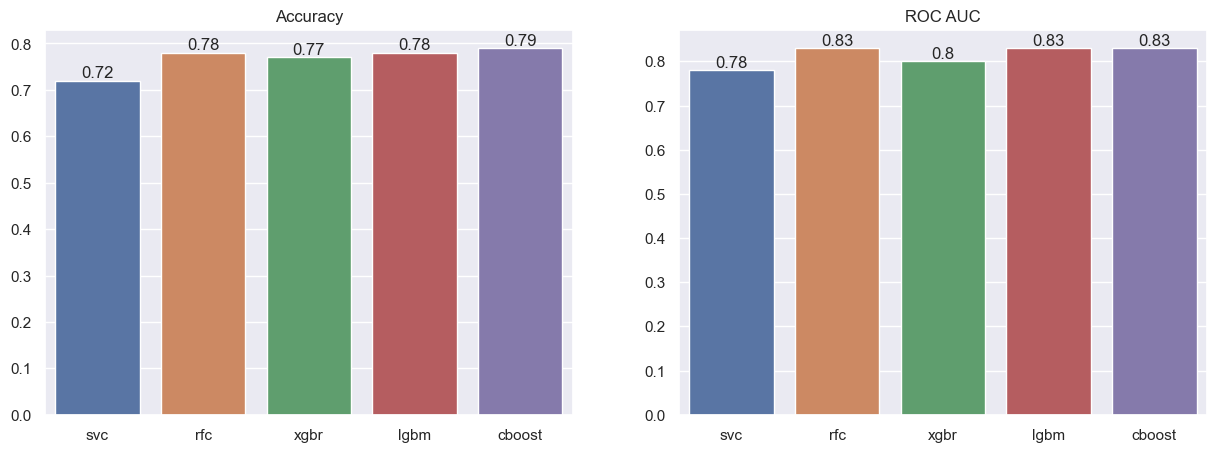

In [73]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=classifier_names,y=accuracy_list,ax=ax1).set_title('Accuracy')
ax1.bar_label(ax1.containers[0])
sns.barplot(x=classifier_names,y=auc_list,ax=ax2).set_title('ROC AUC')
ax2.bar_label(ax2.containers[0])

For this problem, the best model is cboost.

Definition of ROC-AUC

https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/